![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

In [1]:
#importing tensorflow and setting seed to 0 and warnings to off
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [27]:
#Loading data 
import numpy as np
data_path='/content/drive/My Drive/Colab Notebooks/CNN_PROJECT_DATA/images.npy'
data = np.load(data_path,allow_pickle=True)
data[1, :]

array([array([[[207, 216, 227, 255],
        [206, 216, 227, 255],
        [207, 216, 227, 255],
        ...,
        [ 35,  33,  34, 255],
        [ 35,  33,  34, 255],
        [ 35,  33,  34, 255]],

       [[207, 216, 227, 255],
        [207, 216, 227, 255],
        [207, 216, 227, 255],
        ...,
        [ 35,  32,  33, 255],
        [ 35,  33,  34, 255],
        [ 35,  33,  34, 255]],

       [[207, 216, 227, 255],
        [207, 216, 227, 255],
        [207, 215, 227, 255],
        ...,
        [ 35,  33,  33, 255],
        [ 35,  33,  34, 255],
        [ 35,  33,  34, 255]],

       ...,

       [[ 31,  21,  17, 255],
        [ 31,  22,  18, 255],
        [ 31,  22,  18, 255],
        ...,
        [  0,   1,   4, 255],
        [  0,   1,   4, 255],
        [  0,   1,   4, 255]],

       [[ 31,  22,  18, 255],
        [ 31,  22,  18, 255],
        [ 31,  22,  18, 255],
        ...,
        [  0,   1,   4, 255],
        [  0,   1,   4, 255],
        [  0,   1,   4, 255]],

     

### Check one sample from the loaded "images.npy" file  (3 marks)
- Hint: print data[10][1] 

In [4]:

data[10][1]

[{'imageHeight': 337,
  'imageWidth': 600,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.48, 'y': 0.10385756676557864},
   {'x': 0.7716666666666666, 'y': 0.6795252225519288}]}]

In [5]:
#Data shape
data.shape

(409, 2)

### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [6]:

IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
HEIGHT_CELLS = 224
WIDTH_CELLS = 224



### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [7]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

#masks = np.zeros((int(data.shape[0]), 28, 28))
masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Split the data into training and testing (3 marks)
- 400 images in training
- 9 images in testing data

Training data

In [9]:
#Spiltting training data 
X_train =X[:-9, :,:,:] 
y_train = masks[:-9,:,:] 
print(X_train.shape)
print(y_train.shape)


(400, 224, 224, 3)
(400, 224, 224)


Testing data

In [10]:
#splitting Test data
X_test =X[-9:, :,:,:] 
y_test =masks[-9:,:,:]
print(X_test.shape)
print(y_test.shape)


(9, 224, 224, 3)
(9, 224, 224)


### Print a sample training image, image array and its mask (3 marks)

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 ...

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]
  ...
  [-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]]


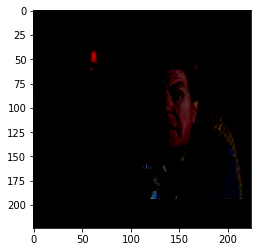

In [11]:

import cv2
import matplotlib.pyplot as plt
print(X_train[20])
plt.imshow(X_train[20])


Print the mask

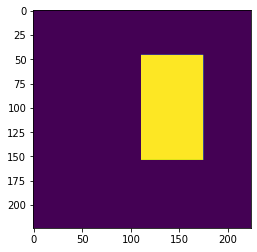

In [12]:

plt.imshow(y_train[20])

## Create the model (7 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [13]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable
     
    block02=  model.get_layer("conv_pw_1_relu").output    
    block01=  model.get_layer("conv_pw_3_relu").output
    block1 = model.get_layer("conv_pw_5_relu").output
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output
    

    x = Concatenate()([UpSampling2D()(block3), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block01])
    x = Concatenate()([UpSampling2D()(x), block02])
    x=UpSampling2D()(x)


    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((224,224))(x)

    return Model(inputs=model.input, outputs=x) 

### Call the create_model function (2 marks)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [14]:
#### Add your code here ####
model = create_model(False)

### Print model summary (2 marks)

In [15]:
#### Add your code here ####
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_______________________________________________________________________________________


### Define dice coefficient function (3 marks)
- Create a function to calculate dice coefficient


In [34]:
## Dice coefficient 
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

### Define loss function (3 marks)

In [35]:
## Loss function
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())


### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [36]:

from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define callbacks (3 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor='loss', verbose=1, save_best_only=True, save_weights_only=True, period=1)

stop = EarlyStopping(monitor='loss', patience=5)

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, min_lr=1e-6,verbose=1)

### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [38]:
#### Add your code here ####
model.fit(X_train,y_train ,epochs=40, batch_size=1, verbose=1,callbacks=[stop,reduce_lr,checkpoint])

Epoch 1/40
398/400 [============================>.] - ETA: 0s - loss: 0.7061 - dice_coefficient: 0.6346
Epoch 00001: loss improved from inf to 0.70525, saving model to model-0.71.h5
400/400 [==============================] - 10s 25ms/step - loss: 0.7052 - dice_coefficient: 0.6348
Epoch 2/40
399/400 [============================>.] - ETA: 0s - loss: 0.7042 - dice_coefficient: 0.6360
Epoch 00002: loss improved from 0.70525 to 0.70439, saving model to model-0.70.h5
400/400 [==============================] - 10s 24ms/step - loss: 0.7044 - dice_coefficient: 0.6359
Epoch 3/40
400/400 [==============================] - ETA: 0s - loss: 0.7037 - dice_coefficient: 0.6361
Epoch 00003: loss improved from 0.70439 to 0.70373, saving model to model-0.70.h5
400/400 [==============================] - 10s 25ms/step - loss: 0.7037 - dice_coefficient: 0.6361
Epoch 4/40
399/400 [============================>.] - ETA: 0s - loss: 0.7040 - dice_coefficient: 0.6358
Epoch 00004: loss improved from 0.70373 to 0.

In [51]:
#Evaluating on Test data
model.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 0s 2ms/step - loss: 0.5720 - dice_coefficient: 0.6718


[0.571964681148529, 0.6718311905860901]

### Get the predicted mask for a test image   (3 marks)

Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


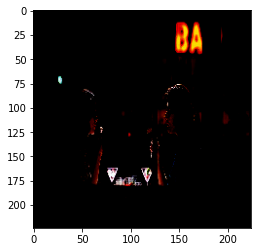

In [40]:

import matplotlib.pyplot as plt
plt.imshow(X_test[7])

Show original mask for test image

 Test image shape:  (224, 224)


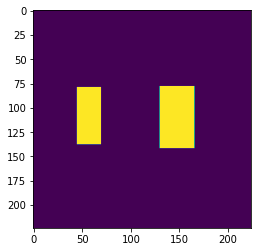

In [41]:

test_image = y_test[7]
print(" Test image shape: ",test_image.shape)
plt.imshow(test_image)

Predict the mask on the test image

Test image shape: (1, 224, 224, 3)


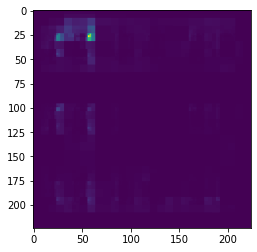

In [44]:

test_image = np.resize(test_image, (1, 224, 224, 3))
print('Test image shape:',test_image.shape)

pred_mask = model.predict(x=test_image)
pred_mask = np.resize(pred_mask, (224, 224))
plt.imshow(pred_mask)

### Impose the mask on the test image (3 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

Test image shape: (1, 224, 224, 3)


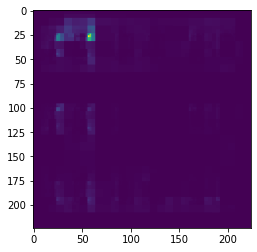

In [47]:
test_image = np.resize(test_image, (1, 224, 224, 3))
print('Test image shape:',test_image.shape)

pred_mask = model.predict(x=test_image)
pred_mask = np.resize(pred_mask, (224, 224))
plt.imshow(pred_mask,alpha=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)


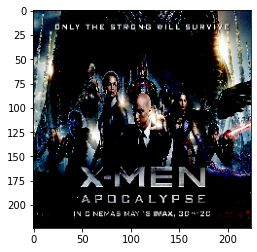

In [48]:

final_image2 = X_test[8]
print(X_test[0].shape)
plt.imshow(final_image2,alpha=1)

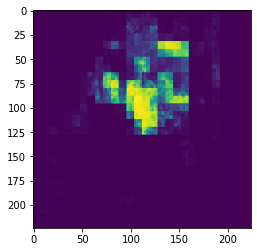

In [49]:
final_image2 = np.resize(final_image2, (1, 224, 224, 3))
pred_mask = model.predict(x=final_image2)
pred_mask = np.resize(pred_mask, (224, 224))
plt.imshow(pred_mask,alpha=1)

Dice coefficient is very similar to the IoU and they both positively correlated. Like the IoU, the Dice coefficient range between 0 to 1, with 1 signifying the greatest in the similarity between predicted and truth.

With this model, Accuracy is less, currently, the training data is 400 images and the test data is 9 images only, it could be the reason for low accuracy. If we use more data to train and test the model then the accuracy might be high.